### Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아 모자이크 처리
- 장면 위주로 된 이미지
- 정면,  옆면, 다양한 각도의 사진
- 웃는 얼굴
- 표정이 있는 얼굴
- 얼굴 크기가 다양한 이미지

In [1]:
!pip install opencv-python

In [1]:
# 모듈

import numpy as np
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

In [2]:
# 캐스케이드 파일 객체 생성

# source from: https://github.com/opencv/opencv/tree/master/data/haarcascades

cascade_file1 = "./data/haarcascade_frontalface_alt.xml"
cascade1 = cv2.CascadeClassifier(cascade_file1)

cascade_file2 = "./data/haarcascade_profileface.xml"
cascade2 = cv2.CascadeClassifier(cascade_file2)

cascade_file3 = "./data/haarcascade_smile.xml"
cascade3 = cv2.CascadeClassifier(cascade_file3)

cascades = [cascade1, cascade2, cascade3]

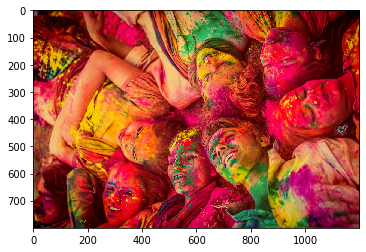

In [3]:
img1 = cv2.imread('./images/party1.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
print(type(img1))

<class 'numpy.ndarray'>


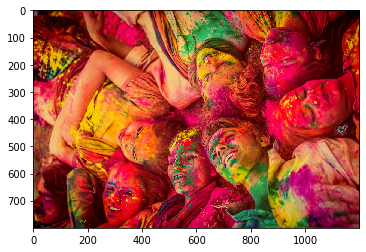

In [4]:
# 이미지 그레이스케일로 변환
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
for cascade in cascades:
    face_list = cascade.detectMultiScale(img1, minSize=(500, 500))

if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for(x, y, w, h) in face_list:
    img = mosaic(img1, (x, y, x+w, y+h), 10)
    
cv2.imwrite("./images/party1-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img1, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("./images/party-detect.png", img1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'cascade' is not defined